In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = '../experimental_data/NoiseAnalysis//MSDnet_Au_fcc_CeO2_MTF4_22112022_model-0_simple_debug/20220301_MEMS13_continous_doserate_increment/ROI3/Au-CeO2-contdoseseries_noADCsmaller/20221202-112538-signal.log'

data = np.genfromtxt(file, dtype=None, names=True)
df = pd.DataFrame(data)
df.drop(df[df['area'] == 0].index, inplace = True) # removing all the empty segmentations

In [3]:
file = '../experimental_data/NoiseAnalysis/Unet_Au_fcc_CeO2_MTF4_22112022_model-0_simple_debug/20220301_MEMS13_continous_doserate_increment/ROI3/Au-CeO2-contdoseseries_noADCsmaller/20221202-114035-signal.log'

data = np.genfromtxt(file, dtype=None, names=True)
df1 = pd.DataFrame(data)
df1.drop(df1[df1['area'] == 0].index, inplace = True)# removing all the empty segmentations

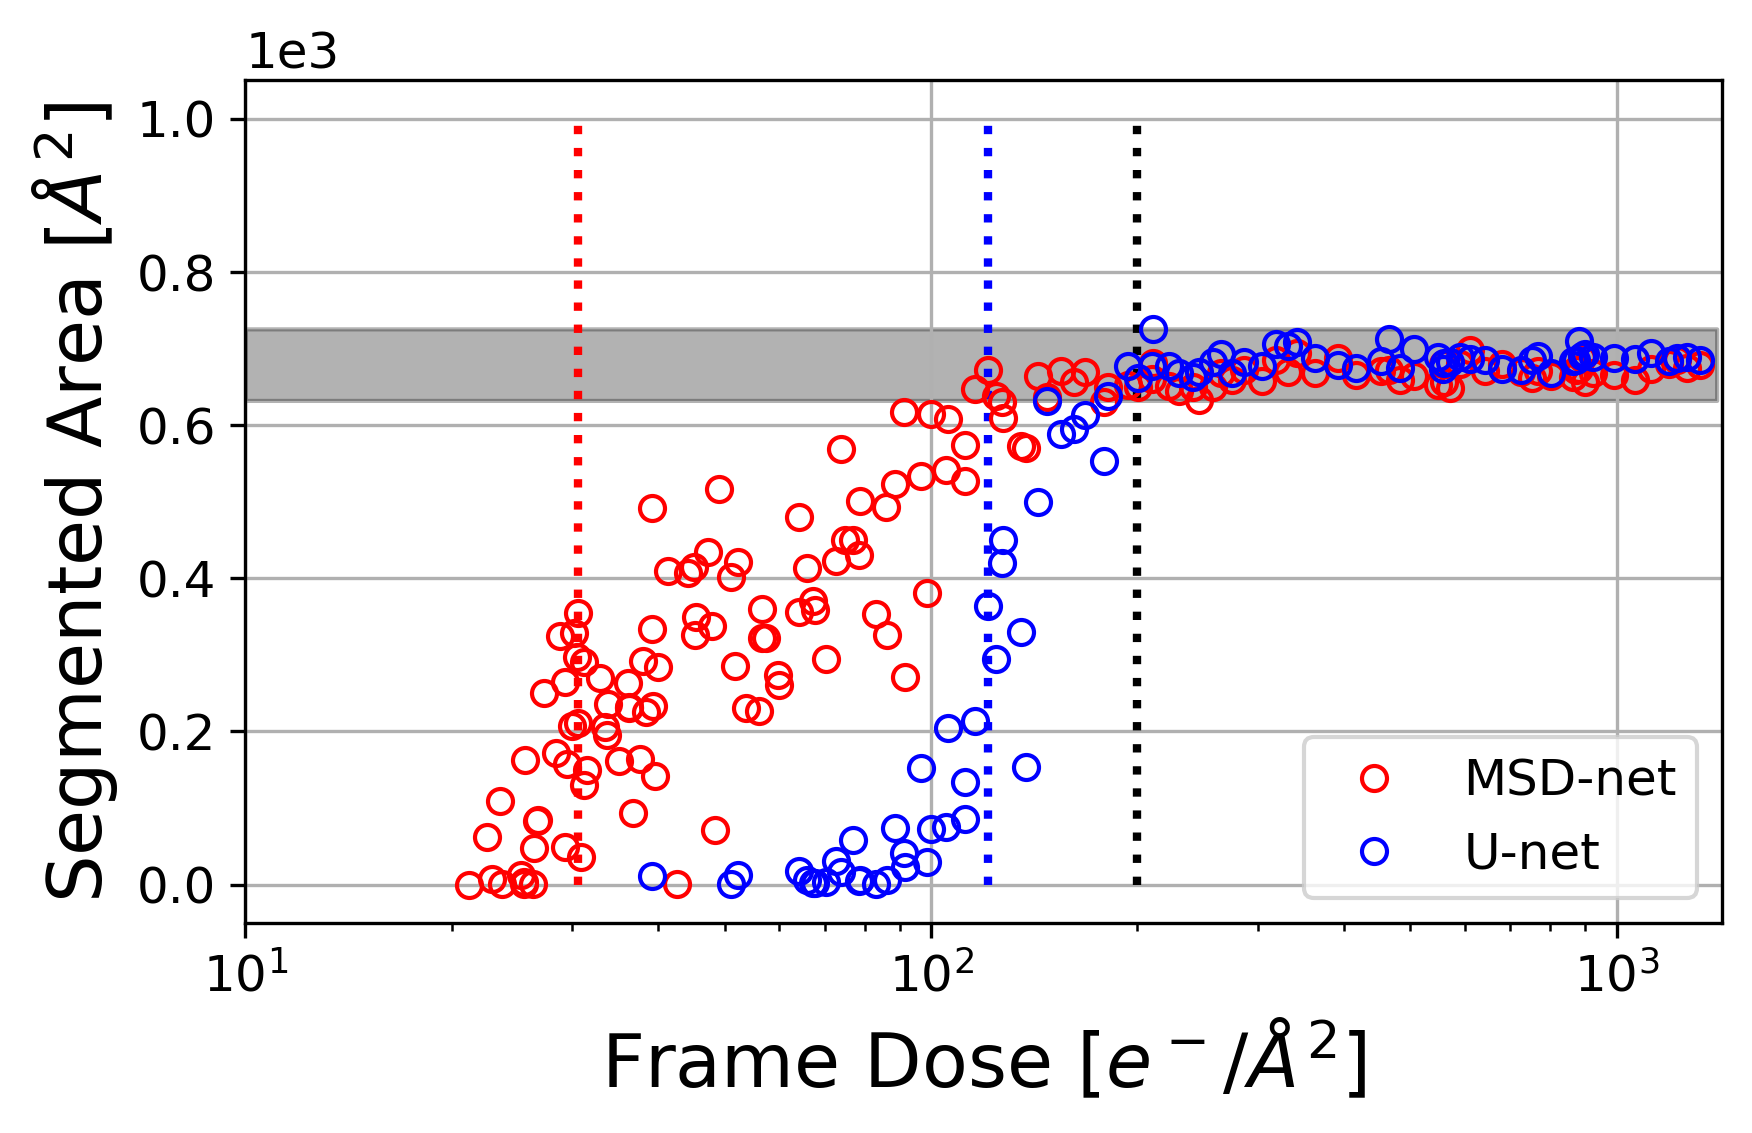

In [4]:
plt.figure()

label = ['MSD-net', 'U-net']
color = ['red', 'blue']

# xaxis convert from doserate to frame dose by multiplication by exposure of 0.2s
x = []
x.append(df['doserate']*0.2)
x.append(df1['doserate']*0.2)

# Area in Å^2
y = []
y.append(df['area']*100) # nm -> Å
y.append(df1['area']*100) # nm -> Å

plt.plot(x[0], y[0], 'o', color=color[0], markerfacecolor='none', label=label[0], alpha=1, linewidth=20)
# locate frame where there is atleast 50% of the area segmented
thresh1 = np.where(y[0].to_numpy()/y[0].to_numpy()[-1] >= 0.5)[0][0]
plt.vlines(x[0].iloc[thresh1], 0, 1000, linestyle=':', linewidth=2, color=color[0])

plt.plot(x[1], y[1], 'o', color=color[1], markerfacecolor='none', label=label[1], alpha=1, linewidth=20)
# locate frame where there is atleast 50% of the area segmented
thresh2 = np.where(y[1].to_numpy()/y[1].to_numpy()[-1] >= 0.5)[0][0]
plt.vlines(x[1].iloc[thresh2], 0, 1000, linestyle=':', linewidth=2, color=color[1])

# Fill between the maximum and minimum after the 200 e-/Å^2 convergence frame
plt.vlines(200, 0, 1000, linestyle=':', linewidth=2, color='black')
# 200 e-/Å^2 is the determined convergence so grab all datapoints above this
convergence1 = np.where(x[0].to_numpy() >= 200)[0][0]
convergence2 = np.where(x[1].to_numpy() >= 200)[0][0]
plt.fill_between(range(10,1400), np.min(y[0][convergence1:].to_list()+y[1][convergence2:].to_list()),
                 np.max(y[0][convergence1:].to_list()+y[1][convergence2:].to_list()), color='black', alpha=0.3)

plt.xscale('log')
plt.grid('minor')

plt.legend(fontsize=12, loc='lower right')

plt.xlabel('Frame Dose [$e^-$/$Å^2$]',fontsize=18)
plt.ylabel('Segmented Area [$Å^2$]', fontsize=18)

plt.xticks(fontsize=12)
plt.xlim([10**1, np.max(x[0])+100])
plt.yticks(fontsize=12)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(12)

plt.tight_layout()
plt.gcf().set_dpi(300)
#plt.savefig('Figure4.png', bbox_inches='tight')
plt.show()